
# <center>Python - Time Complexity, Big O, Space Complexity <a class="tocSkip"></center>
# <center>QTM 350: Data Science Computing <a class="tocSkip"></center>    
# <center>Davi Moreira <a class="tocSkip"></center>

## Introduction <a class="tocSkip">
<hr>


This topic material is based on [Professor Mike Gelbart Algorithms and Data Structures course](https://github.com/UBC-MDS/DSCI_512_alg-data-struct). It was adapted for our purposes.

In [21]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## About this course topic

### Demo 1: searching (list vs. set)

- Common problem: is a certain value present in a collection of items?

In [ ]:
n = 10_000_000
x = list(range(n))

In [ ]:
-1 in x

In [ ]:
%timeit (-1 in x)

In [ ]:
x = set(range(n))

In [ ]:
-1 in x

In [ ]:
%timeit (-1 in x)

Questions we'll answer in this topic:

- How could I have predicted this outcome?
- What if I double the size of $n$: how much slower will the code be in each case? (Quantitative analysis)
- Why did this happen? (not in detail)

Note: we were cheating a little bit, because _creating_ the set takes longer than creating the list. However, as we can see, it's still fast.

### Demo 2: sorting (selection vs. quick)

Aside: min vs. argmin

In [ ]:
x = [4.2, 98.2, 9.0, 0.1, 30, 2.5, 2.6]

In [ ]:
min(x)  # Python min

In [ ]:
np.min(x)  # Numpy min: generally better if working with Numpy arays

In [ ]:
np.argmin(x)

In [ ]:
x[3]

Above: `np.argmin` gives us the _index of_ the smallest value.

Now, back to the demo.

In [ ]:
n = 20_000
x = list(range(n))

In [ ]:
np.random.shuffle(x)

In [ ]:
x[:10]

In [ ]:
for i in range(n):
    min_ind = np.argmin(x[i:]) + i
    x[i], x[min_ind] = x[min_ind], x[i] # swap

In [ ]:
x[:10]

In [ ]:
np.random.shuffle(x)

In [ ]:
x[:10]

In [ ]:
x.sort()

In [ ]:
x[:10]

Questions we'll answer in this topic:

- How could I have predicted this outcome?
- What if I double the size of $n$, how much slower will the code be in each case? (Quantitative analysis)
- Why did this happen? (not in detail)

### Demo 3: batch operations (loop vs. vectorized)

In [ ]:
n = 10_000_000
x = np.random.rand(n)
y = np.zeros(n)

In [ ]:
x.shape

In [ ]:
y.shape

In [ ]:
x[:10]

In [ ]:
y[:10]

In [ ]:
for i in range(n):
    y[i] = x[i] * 2

In [ ]:
x = np.random.rand(n)
y = np.zeros(n)

In [ ]:
y = x * 2

Questions we'll answer in this topic:

- How could I have predicted this outcome?
- What if I double the size of $n$, how much slower will the code be in each case? (Quantitative analysis)
- Why did this happen? (not in detail)

In this topic our objective is to loarn about:
    
    1. Good Data Structure;
    2. Good Algorithms;
    3. Good Implementation;

## Lecture learning objectives

- Given code, determine the time and space complexity using Big-O notation.
- Classify an algorithm into one of the common complexity classes (e.g. constant, logarithmic, linear, quadratic, etc.).
- Contrast time and space complexity.
- Measure the amount of time code in Python takes using `timeit` or the `time` library.
- Maintain an awareness that choosing a good algorithm matters, sometimes _a lot_!

## Motivation

- For now, let's ask ourselves: "if we double $n$, what happens to the number of steps?"

### Examples from the above demos

For each of the following, what happens to the runtime if we double $n$?

**Operation:** Finding whether a number is in a list.
<br><br><br><br><br><br>
**Answer:** it doubles.
<br>


**Operation:** Finding whether a number is in a set.
<br><br><br><br><br><br>
**Answer:** it stays roughly the same.
<br>

**Operation:** Sorting with my code.
<br><br><br><br><br><br>
**Answer:** it quadruples (4x)
<br><br>

**Operation:** Sorting with `sort`.
<br><br><br><br><br><br>
**Answer:** it slightly more than doubles
<br><br>

**Operation:** Doubling an array with a loop.
<br><br><br><br><br><br>
**Answer:** it doubles
<br><br>  
  

**Operation:** Doubling an array with numpy.
<br><br><br><br><br><br>
**Answer:** it doubles (but is much faster than with a loop!)
<br><br>  

  


These scenarios form part of the roadmap of the topic - by the end we'll hopefully have explored most of them.

## Big O notation - intro

- We will formalize time complexity using _Big O notation_. 
  - In addition to $O$, there is also $o$, $\omega$, $\Omega$, $\theta$, $\Theta$, and more. But Big O is the most common and we'll only discuss Big O.
  - We will not go into the mathematical details but if you're interested, you can read about it online (e.g. the [Wikipedia article](https://en.wikipedia.org/wiki/Big_O_notation)).
- The Big O tells us the **approximate number of steps** an algorithm performs **as a function of the input size** (i.e. $n$ above).


### Importance in Data Science

Big O notation is a mathematical notation that describes the limiting behavior of a function when the argument tends towards a particular value or infinity. In the context of data science and computer science, it is primarily used to classify algorithms according to their running time or space requirements (memory usage) under the assumption of large input size. The "O" in Big O notation stands for "order of", indicating the order of complexity of an algorithm.


For data scientists, understanding Big O notation is crucial for several reasons:

1. **Efficiency Analysis:** It allows data scientists to estimate the time and space efficiency of algorithms, particularly important when dealing with large datasets. Efficient algorithms can significantly reduce computational time and resource consumption.

2. **Algorithm Selection:** By comparing the Big O notations of different algorithms, data scientists can choose the most appropriate algorithm for a given problem and dataset size. This choice is critical in ensuring that the data processing and analysis tasks are scalable.

3. **Performance Optimization:** Understanding the Big O notation helps in identifying bottlenecks in existing algorithms and optimizing them for better performance.


### Application in Data Science

In data science, Big O notation helps in understanding the scalability of data processing, machine learning algorithms, and data manipulation tasks. It aids in making informed decisions about algorithm design and implementation, ensuring that the solutions are efficient and scalable as the data volume grows. Data scientists often need to balance the trade-off between the accuracy of a model and its computational efficiency, and Big O notation provides a framework for making such decisions.

### Simple examples demonstrating different Big O notations

A simple way to estimate the efficiency of algorithms in terms of their time complexity

### $O(1)$ - Constant Time
Accessing the last element of a list is an example of an O(1) operation. It takes the same time regardless of the list's size.

```python
my_list = [1, 2, 3, 4, 5, 3, 2]

def access_last_element(my_list):
    return my_list[-1]
```
For our sample list `[1, 2, 3, 4, 5, 3, 2]`, accessing the last element yields `2`.

### $O(n)$ - Linear Time
Summing all elements in a list is an O(n) operation. The time taken is directly proportional to the list's size.

```python
def sum_elements(my_list):
    total = 0
    for element in my_list:
        total += element
    return total
```
For our sample list, the sum of the elements is `20`.

### $O(n^2)$ - Quadratic Time
Finding duplicates in a list is an example of an $O(n^2)$ operation. The time taken increases quadratically with the size of the input list.

```python
def find_duplicates(my_list):
    duplicates = []
    for i in range(len(my_list)):
        for j in range(i + 1, len(my_list)):
            if my_list[i] == my_list[j] and my_list[i] not in duplicates:
                duplicates.append(my_list[i])
    return duplicates
```
For our sample list, the duplicates found are `[2, 3]`.



### Common runtimes

| Big O  &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; |  name  | change in runtime if I double $n$? |
|-------|--------|-------|
| $O(1)$ | constant | same |
| $O(\log n)$ | logarithmic | increased by a constant |
| $O(n)$ | linear | 2x | 
| $O(n \log n)$ | linearithmic | roughly 2x | 
| $O(n^2)$ | quadratic | 4x |
| $O(n^3)$ | cubic | 8x |
| $O(n^k)$ | polynomial | increase by a factor of $2^k$ | 
| $O(2^n)$ | exponential | squared |

- We write $O(f(n))$ for some function $f(n)$.
- You get the doubling time by taking $f(2n)/f(n)$.
- E.g. if $f(n)=n^3$, then $f(2n)/f(n)=(2n)^3/n^3=8$. 
  - So if you double $n$, the running time goes up 8x.
- For $O(2^n)$, increasing $n$ by 1 causes the runtime to double!

Note: these are **common** cases of big O, but this list is not exhaustive.

#### Back to the examples from earlier 

For each of the following, what is the time complexity in Big O notation?

- Finding whether a number is in a list.

> Answer: $O(n)$

- Finding whether a number is in a set.

> Answer: $O(1)$ (more on this next week)


- Sorting with my code.


> Answer: $O(n^2)$

- Sorting with `sort`.


> Answer: $O(n \log n)$ (more on this next class)

- Doubling with a loop.


> Answer: $O(n)$

- Doubling with numpy.

> Answer: $O(n)$

### Constant factors are not important

- In Big O notation, we ignore multiplicative constants.
  - If an algorithm takes $2n$ steps, we write $O(n)$, not $O(2n$).
  - We're interested in how the runtime grows, not the exact runtime.
- In Big O notation, we ignore "lower order" terms, including additive constants.
  - If the number of steps is $n+5$, we write $O(n)$ not $O(n+5)$
  - If the number of steps is $n+\log n$, we write $O(n)$ not $O(n+\log n)$
  - We're interested in the growth when $n$ is large.
  - The lower order terms stop being important when $n$ is large. 
  - But they might be important when $n$ is small!
- As such, Big O complexities can be misleading at times.
  - Is code that runs in $O(\log n)$ time faster than code that runs in $O(n)$ time?
  - Not always! It depends on the details.
  - $10000\log n$ is more than $0.001n$ for small values of $n$.
  - You will see an example of this phenomenon in lab 2.

## Time Complexity and Space Complexity

In the context of analyzing algorithms, both time complexity and space complexity play crucial roles, offering insights into the efficiency of algorithms from different perspectives. While time complexity relates to the execution time of an algorithm as a function of the input size, space complexity concerns the amount of memory an algorithm needs to run to completion. Time and space complexities offer a comprehensive view of an algorithm's efficiency, guiding data scientists and engineers in making informed decisions to meet their application's performance and resource requirements.

### Time Complexity

Time complexity is a measure that gives us an idea of the growth rate of the runtime of an algorithm as the size of input data increases. It's crucial for understanding how scalable an algorithm is with respect to processing time. In a data-rich field like data science, where datasets can be enormous, knowing the time complexity helps in selecting algorithms that can handle large volumes of data efficiently.

For example, an algorithm with a time complexity of $O(n)$ will take twice as long if the input size doubles, which is manageable. However, an algorithm with a time complexity of $O(2^n)$ will see its runtime double with each additional element in the input, becoming impractical for large datasets.

### Space Complexity

Space complexity, on the other hand, measures the total amount of memory that an algorithm requires as the input size grows. This includes both the space needed to store input data and any additional space required by the algorithm (temporary variables, call stack for recursive calls, etc.). In scenarios where memory is a limiting factor, understanding space complexity becomes as critical as understanding time complexity.

For instance, an in-place sorting algorithm that sorts the data within the given array with minimal additional memory ($O(1)$ space complexity) is preferable in memory-constrained environments over an algorithm that requires space proportional to the size of the input data ($O(n)$ space complexity).

### Differences and Usefulness

**Differences:**
- **Dimension of Analysis:** Time complexity measures the runtime of an algorithm, whereas space complexity measures the memory usage.
- **Impact on Performance:** While both can affect the performance of an algorithm, time complexity often directly impacts user experience through execution speed. Space complexity impacts how much data can be processed or stored in memory at one time.
- **Scalability Concerns:** Time complexity is often the first consideration for scalability, especially with large datasets. However, space complexity becomes equally important in environments with limited memory resources, like embedded systems or when processing extremely large datasets that do not fit in memory.

**Usefulness:**
- **Algorithm Selection:** Understanding both complexities helps in selecting the right algorithm for a given problem, balancing between execution speed and memory usage.
- **Optimization:** By analyzing these complexities, one can identify bottlenecks in an algorithm and optimize either for speed or for memory usage, depending on the requirements of the application.
- **System Design:** In system design, especially for large-scale systems, knowing the time and space complexities of algorithms can guide architectural decisions, such as choosing between different data processing strategies or storage solutions.



## Visualizing time complexities 

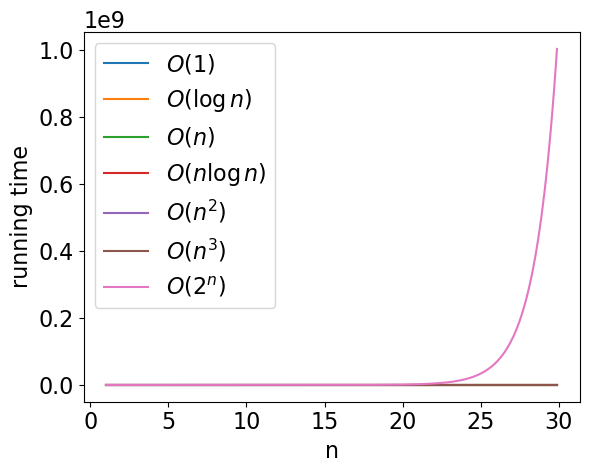

In [22]:
n = np.arange(1, 30, 0.1)

times = {
    '$O(1)$': 0*n+1,
    r'$O(\log n)$': np.log(n),  # raw string literal
    '$O(n)$': n,
    r'$O(n \log n)$': n*np.log(n),  # raw string literal
    '$O(n^2)$': n**2.,
    '$O(n^3)$': n**3.,
    '$O(2^n)$': 2.**n
}

for name, t in times.items():
    plt.plot(n, t, label=name)
plt.legend();
plt.xlabel('n');
plt.ylabel('running time');

It is also common to look at log-log plots:

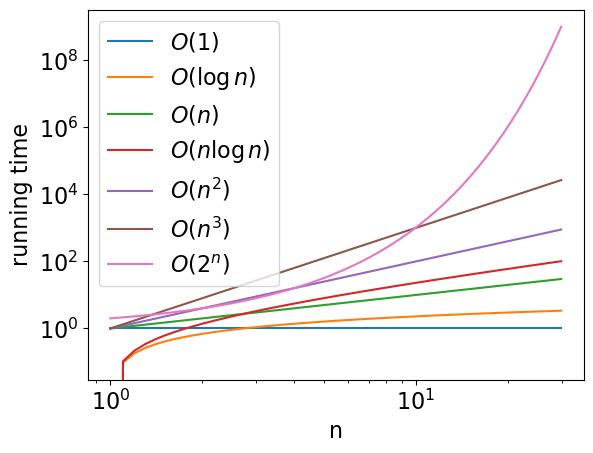

In [23]:
for name, t in times.items():
    plt.loglog(n, t, label=name)
plt.legend();
plt.xlabel('n');
plt.ylabel('running time');

- Above: we see that $2^n$ (exponential) is by far the biggest! 
- Let's remove $2^n$ so we can see the rest of the log-log plot more clearly:

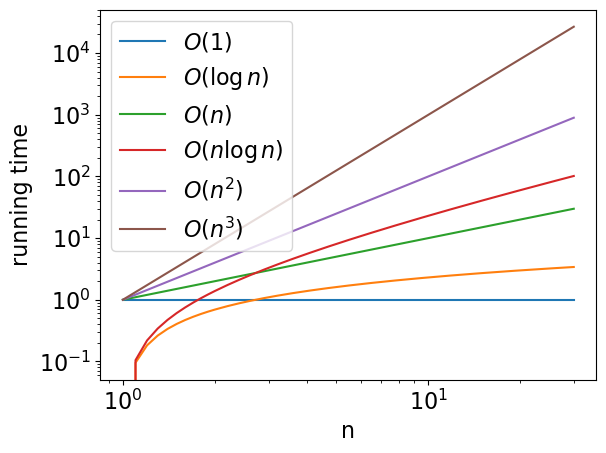

In [24]:
for name, t in times.items():
    if name != '$O(2^n)$':
        plt.loglog(n, t, label=name)
plt.legend();
plt.xlabel('n');
plt.ylabel('running time');

In log-log plots, polynomials turn into straight lines, with slope equal to the exponent.

## Example Big O analysis

Find the time complexities of `f` and `g` below.

In [ ]:
def f(n):
    for i in range(n):
        for j in range(n):
            print(i, j)

In [ ]:
#%timeit f(2000)

The function `f(n)` consists of a nested loop where both the outer and inner loops are controlled by the parameter `n`. The outer loop runs `n` times, and for each iteration of the outer loop, the inner loop also runs `n` times.

For each iteration of the inner loop, a print statement is executed, which we consider as the basic unit of work done by the function. The total number of print operations will be `n * n`, as for every single iteration of the outer loop, the inner loop runs `n` times.

This leads to a time complexity of $O(n^2)$, which is quadratic time complexity. In Big O notation, we are primarily interested in how the function scales with the input size, `n` in this case, rather than the specific number of operations performed. As `n` grows, the time it takes to run this function will grow proportionally to the square of `n`.

Therefore, if `n` were to double, the runtime would increase by a factor of four, since $(2n)^2 = 4n^2$. This quadratic relationship indicates that the function `f(n)` may become inefficient for large values of `n`, as the number of operations will increase rapidly.

In [ ]:
def g(n):
    for i in range(n):
        print(i)
    for j in range(n):
        print(j)

In [ ]:
#%timeit g(200_000)

In [ ]:
# g(3)

The function `g(n)` contains two separate loops that are not nested. Each loop runs independently for `n` iterations.

1. The first loop iterates `n` times, printing values from `0` to `n-1`.

2. After the first loop completes, the second loop starts and also iterates `n` times, again printing values from `0` to `n-1`.

Since the loops are consecutive and not nested, the number of print operations for each loop is `n`, and the total number of print operations for the entire function is `n + n`, which simplifies to `2n`.

However, when we express this in Big O notation, we drop constant coefficients and lower order terms because we are interested in the growth rate of the operation count as `n` becomes very large. Thus, the time complexity of the function `g(n)` is $O(n)$, indicating a linear relationship between the input size `n` and the execution time.

This means that if the input size doubles, the runtime will also roughly double, making this function much more scalable for large values of `n` compared to a function with a time complexity of $O(n^2)$, like the one in the previous example.

### How to determine the complexity?

- With raw Python code, we can often "count the number of loops"
  - A loop $n$ times gives $O(n)$
  - A nested loop gives $O(n^2$)
  - etc
- However, we have to think about the functions we're using. 

### What factors affect the runtime?

- What affects the Big O?
  - Typically, just the algorithm.
- What affects the constant?
  - The algorithm.
    - Does it take $n$ steps or $2n$ steps or $100000n$ steps?
    - How complicated is each step?
  - The _implementation_.
    - How fast is your programming language?
    - How fast are your libraries (e.g. Numpy)?
    - How fast is your laptop?
    - Is there an opportunity for parallel computation?
- The implementation issues are quite complicated. 
  - More on this later.

## Lower order terms revisited 

Why is $O(n+\log(n)+5)$ considered the same as $O(n)$?


In [ ]:
plt.rcParams['font.size'] = 16

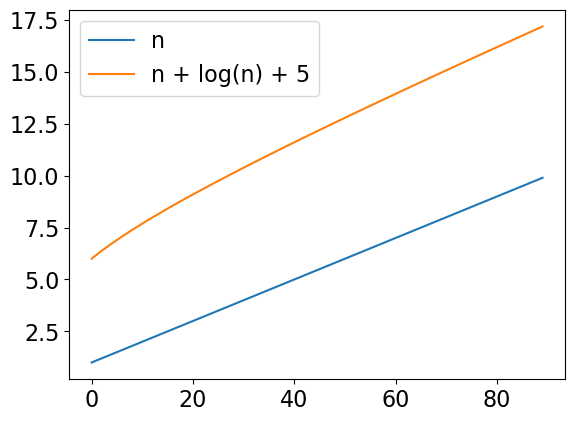

In [25]:
n = np.arange(1,10, 0.1)
plt.plot(n, label="n")
plt.plot(n+np.log(n)+5, label="n + log(n) + 5")
plt.legend();

- What you can see here is that $n+\log(n)+5$ starts curved but soon becomes linear-looking.
- We call the $\log(n)$ and the $5$ "lower order terms" because the grow more slowly than the dominant term ($n$).

### For small n, the lower-order terms matter

- Consider an algorithm that takes $100\sqrt{n}$ steps vs. an algorithm that takes $n$ steps.
- According to big O, the second one is a faster growing function, meaning the code will be slower.
- Let's plot it:

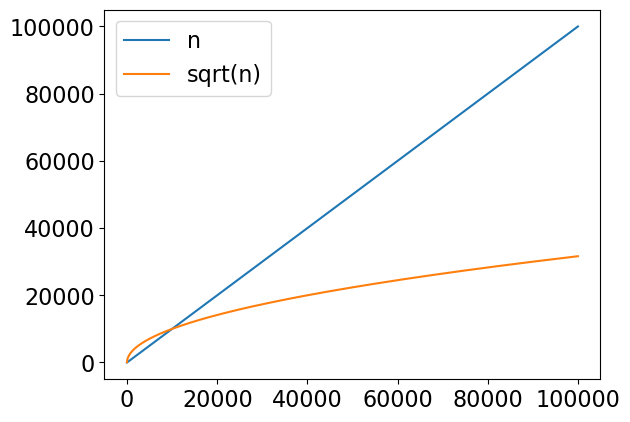

In [26]:
n = np.arange(1,100000)
plt.plot(n, label="n")
plt.plot(100*np.sqrt(n), label="sqrt(n)")
plt.legend();

- That seems to be true, $n$ grows faster than $\sqrt{n}$.
- But what if we zoom in:

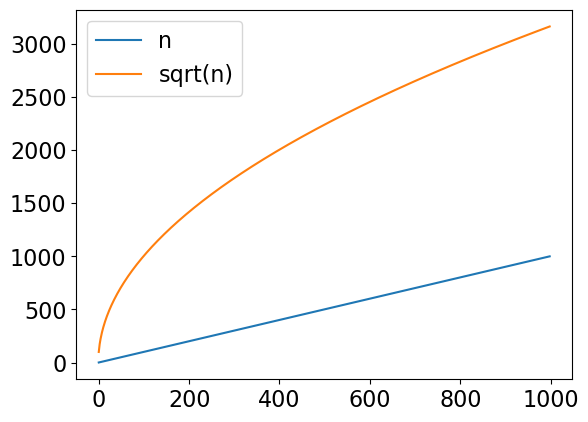

In [27]:
n = np.arange(1,1000)
plt.plot(n, label="n")
plt.plot(100*np.sqrt(n), label="sqrt(n)")
plt.legend();

- Actually, at first, the $100\sqrt{n}$ algorithm is slower! 
- So, we can't ignore the lower order terms all the time, we can just ignore them a lot of the time.
- Big O analysis isn't the be-all and end-all. It's just often useful.

### Addition vs. multiplication

- How is $n+\log(n)$ different from $n\log(n)$
- The first is $O(n)$, what about the second?

<br><br><br><br>

- The second is $O(n\log(n))$. 
- In Big O analysis, we keep the biggest **term**. 
  - Where "terms" are things being added together (not multiplied!)
- In the first case, the biggest term is $n$.
- In the second case, the biggest (and only) term is $n \log(n)$.

<br><br><br>

## Big O with two variables 

Consider this code:

In [ ]:
def fun(n,m):
    for i in range(n):
        for j in range(m):
            print("Hello")

What is the time complexity?

- The time complexity here is $O(nm)$. 
- If $m=n$  then it would be $O(n^2)$. 
- Note that everything should be combined in one big O 
  - it should be $O(nm)$ and not $O(n)O(m)$. 
- Likewise with addition, one would write $O(n+m)$ and not $O(n)+O(m)$.
- $O(nm+m)$ would be just $O(nm)$
  - $nm+m=(n+1)m$ and we don't make a distinction between $n$ and $n+1$
- $O(n^2+n+m)$ would be just $O(n^2+m)$
- $O(n^2+nm + m)$ would be $O(n^2+nm)$. We can't throw away either term because we don't know which will end up being the "dominant" factor.

- Example: in a data analysis course you have datasets with $n$ rows and $d$ columns.
- How long does `fit()` take for a decision tree? 
- At least $O(nd)$ because that's how long it takes to look at the dataset.
  - Actually it takes longer than this!
  - But decision tree is a bit harder to analyze than some classifiers you'll learn next week.
  - The actual runtime is something like $O(mnd \log n)$ for a depth-$m$ tree.

## Worst/best/average cases 

Consider this code:

In [ ]:
def find_0(x):
    for x_i in x:
        if x_i == 0:
            return True
    return False

- If $n$ is the length of `x`, the runtime here is $O(n)$
- But is it always? What if we know `x[0]` is always 0, for any $n$? Then it's $O(1)$.
- What if the $0$ could be anywhere? Then it's $n/2$ on average which is $O(n)$.
- Sometimes algorithms have different _best case_, _worst case_ and _average case_ runtimes. 
- In this topic we won't go into this distinction. We're generally referring to the average case, which often is the same complexity as the worst cases anyway.

## Space complexity

- If code takes too long to run, that might be a problem.
- Another possible problem is running out of memory.
  - Note: this is NOT the same as "disk space".

In [16]:
import psutil
psutil.virtual_memory()

svmem(total=17179869184, available=3814539264, percent=77.8, used=6473400320, free=24100864, active=3806314496, inactive=3771367424, wired=2667085824)

The `psutil` library in Python, which provides information about the virtual memory usage on your computer. Here's how to interpret the various fields:

1. `total`: This is the total amount of physical memory (RAM) available on your machine. The value is given in bytes.

2. `available`: This is the memory that can be given instantly to processes without the system going into swap. It is calculated by taking into account how much the operating system reserves for itself and may include memory that is in use but can be made available immediately if needed.

3. `percent`: This represents the percentage of memory that is currently being used or in other words, how much memory is active or unavailable out of the total memory.

4. `used`: This is the amount of memory that is currently being used by the operating system and all running processes.

5. `free`: This is the amount of physical memory that is not being used by any process.

6. `active`: This is the total amount of buffer or cached memory that is actively used by processes and the operating system.

7. `inactive`: This is the amount of memory that is marked as not used.

8. `wired`: This is memory that is marked to always stay in RAM. It is never moved to disk.

For the specific values:

- `total`: 17179869184 bytes (~17 GB)
- `available`: 3814539264 bytes (~3.8 GB)
- `percent`: 77.8% (indicating that 77.8% of your total memory is in use)
- `used`: 6473400320 bytes (~6.47 GB)
- `free`: 24100864 bytes (~24 MB)
- `active`: 3806314496 bytes (~3.8 GB)
- `inactive`: 3771367424 bytes (~3.77 GB)
- `wired`: 2667085824 bytes (~2.67 GB)

It appears that a substantial portion of my memory is used or reserved by processes (`active`), and a significant amount is `inactive` which could be used by other processes if necessary. The `free` memory is quite low, which is typical for modern operating systems that utilize as much RAM as possible for caching and other purposes to speed up the system's performance. The `wired` memory is likely being used by the system's kernel and by applications that have requested non-swappable memory. The `percent` indicates that you might be running many applications or dealing with large datasets, given that more than three-quarters of your RAM is in use.

- Apparently I have about 17 GB of RAM.
- A number typically takes up 8 bytes, so I can store around 2 billion numbers.
  - Actually less, because I have other stuff going on, not just Python.
  - Plus, there's overhead from within Python.
- If my code needs to store 2 billion numbers _at the same time_, I can't run it on my laptop. 
- We also analyze space complexity using Big O notation.


- With _time complexity_, we tend to think more about the _algorithms_.
- With _space complexity_, we tend to think more about the _data structures_.



**Example 1:**

```python
x = np.zeros(n)
```

<br><br><br>
<br><br><br>
Space complexity: $O(n)$



When `np.zeros(n)` is called, it allocates memory for an array that can hold `n` elements. Each element in the array is a floating-point number (typically 8 bytes for a double-precision float, but this can vary). The space required for the array is directly proportional to the number of elements `n` that it needs to contain. Therefore, if the array size doubles, so does the memory requirement.

The notation $O(n)$ describes that the space required grows linearly with the input size `n`. This means the relationship between the size of the input (`n`) and the amount of memory required (space complexity) is linear.


**Example 2:**

```python
x = np.zeros((n,n))
```

<br><br><br>
<br><br><br>
Space complexity: $O(n^2)$



Each element of this two-dimensional array requires a fixed amount of space, and since there are `n` rows and `n` columns, the total amount of space required is proportional to `n * n`, or `n^2`. The space complexity refers to how much memory the algorithm needs in relation to the input size. In this case, because the array is two-dimensional, the space required grows quadratically with the input `n`.

We denote this space complexity as $O(n^2)$. It indicates that if you increase the size of `n`, the memory required increases by the square of that size. For example, if `n` is 10, you need space for 100 elements. If `n` is 100, you need space for 10,000 elements, and so on.


**Example 3:**

```python
x = zeros((n,n,5))
```

<br><br><br>
<br><br><br>
Space complexity: $O(n^2)$



This array consists of `n` two-dimensional arrays (or matrices), each of which is of size `n` by `5`. Thus, the total number of elements is `n * n * 5`. However, since Big O notation focuses on the rate of increase and not the exact number of operations, constants are typically ignored in the expression of complexity. The significant part is that the space needed scales with the square of `n`. The multiplication by `5` is a constant factor and does not change the order of growth in Big O terms.

Although the array is technically three-dimensional, because one of the dimensions is a constant (5), the space complexity is not cubic but rather quadratic. Therefore, the space complexity is denoted as $O(n^2)$, which reflects the most significant factor in the space requirement as `n` becomes large.



**Example 4:**

```python
x = zeros((n,n,n))
```

<br><br><br>
<br><br><br>
Space complexity: $O(n^3)$

Since the array is a cube with each side of length `n`, the total number of elements in the array is `n * n * n`, which simplifies to `n^3`. Each element in the array is presumably a floating-point number which requires a fixed amount of space.

With each increase in `n`, the space required for this array grows cubically, hence the space complexity is $O(n^3)$. This is a much faster growth rate compared to linear (O(n)) or quadratic (O(n^2)) space complexities. 



**Example 5:** 

You have $n$ users on your social network site, and you want to store a "level of friendship" between every pair of users.

<br><br><br>
<br><br><br>
Space complexity: $O(n^2)$



**Example 6:**

You have $n$ users on your social network site, and you want to store who is friends with who.

<br><br><br>
<br><br><br>
Space complexity: it depends! If each user only has a constant (independent of $n$) number of friends, then $O(n)$. But in the worst case it could be $O(n^2)$. 




In [28]:
!jupyter nbconvert _01-py-complexity-big-O.ipynb --to html --template classic --output 01-py-complexity-big-O.html

[NbConvertApp] Converting notebook _01-py-complexity-big-O.ipynb to html
[NbConvertApp] Writing 355595 bytes to 01-py-complexity-big-O.html


# <center>Thank you!<a class="tocSkip"></center>